# Reading optimisation results into dataframes

In [201]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
#grid search
with open('../raport/knn_naive.json', 'r') as file:
    data_knn = json.load(file)
with open('../raport/logistic_naive.json', 'r') as file:
    data_logistic = json.load(file)
with open('../raport/xgboost_naive.json', 'r') as file:
    data_Xgboost = json.load(file)

print('liczba ramek danych do KNN:',len(data_knn))
print('liczba ramek danych do logistic regression:',len(data_logistic))
print('liczba ramek danych do Xgboost:',len(data_Xgboost))

liczba ramek danych do KNN: 5
liczba ramek danych do logistic regression: 5
liczba ramek danych do Xgboost: 5


In [186]:
# reading json files into dataframes for each model
#KNN
def load_KNN_dataframe(data):
    records=[]
    best_records =[]

    #iterate through each dict in json
    for index, item in enumerate(data):
        best_params = item['best_params']
        best_score = item['best_score']

        best_record = {
            'df_number': index,
            'algorithm': best_params['algorithm'],
            'leaf_size': best_params['leaf_size'],
            'metric': best_params['metric'],
            'n_neighbors': best_params['n_neighbors'],
            'weights': best_params['weights'],
            'best_score': best_score
        }
        best_records.append(best_record) #dataframe with best KNN parameters for each dataframe
        
        for result in item['results']:
            params = result['params']
            record = {
                'df_number': index,
                'algorithm': params['algorithm'],
                'leaf_size': params['leaf_size'],
                'metric': params['metric'],
                'n_neighbors': params['n_neighbors'],
                'weights': params['weights'],
                'mean_test_score': result['mean_test_score']
            }
            records.append(record) #dataframe with all parameter combinations for each dataframe

    return (pd.DataFrame(best_records), pd.DataFrame(records))

In [187]:
# Logistic regression
def load_log_reg_dataframe(data):
    records = []
    best_records = []

    # iterate through each dict in json
    for index, item in enumerate(data):
        best_params = item['best_params']
        best_score = item['best_score']
        
        # best params for each dataframe
        best_record = {
            'df_number': index,
            'C': best_params['C'],
            'class_weight': best_params['class_weight'],
            'fit_intercept': best_params['fit_intercept'],
            'max_iter': best_params['max_iter'],
            'penalty': best_params['penalty'],
            'random_state': best_params['random_state'],
            'solver': best_params['solver'],
            'tol': best_params['tol'],
            'best_score': best_score
        }
        best_records.append(best_record)

        # all parameter combinations for each dataframe
        for result in item['results']:
            params = result['params']
            record = {
                'df_number': index,
                'C': params['C'],
                'class_weight': params['class_weight'],
                'fit_intercept': params['fit_intercept'],
                'max_iter': params['max_iter'],
                'penalty': params['penalty'],
                'random_state': params['random_state'],
                'solver': params['solver'],
                'tol': params['tol'],
                'mean_test_score': result['mean_test_score']
            }
            records.append(record) #

    return(pd.DataFrame(best_records), pd.DataFrame(records))


In [188]:
# XGboost
def load_xgboost_dataframe(data):
    records = []
    best_records = []

    # iterate through every dict in json
    for index, item in enumerate(data):
        best_params = item['best_params']
        best_score = item['best_score']
        
        # best parameters for each df
        best_record = {
            'df_number': index,
            'eval_metric': best_params['eval_metric'],
            'gamma': best_params['gamma'],
            'learning_rate': best_params['learning_rate'],
            'max_depth': best_params['max_depth'],
            'min_child_weight': best_params['min_child_weight'],
            'n_estimators': best_params['n_estimators'],
            'n_jobs': best_params['n_jobs'],
            'random_state': best_params['random_state'],
            'best_score': best_score
        }
        best_records.append(best_record)

        # all parameter combinations for each df 
        for result in item['results']:
            params = result['params']
            record = {
                'df_number': index,
                'eval_metric': params['eval_metric'],
                'gamma': params['gamma'],
                'learning_rate': params['learning_rate'],
                'max_depth': params['max_depth'],
                'min_child_weight': params['min_child_weight'],
                'n_estimators': params['n_estimators'],
                'n_jobs': params['n_jobs'],
                'random_state': params['random_state'],
                'mean_test_score': result['mean_test_score']
            }
            records.append(record)
    return(pd.DataFrame(best_records), pd.DataFrame(records))

## Grid Search results

In [118]:
knn_best_params, knn_all_params = load_KNN_dataframe(data_knn)
log_best_params, log_all_params = load_log_reg_dataframe(data_logistic)
xg_best_params, xg_all_params = load_xgboost_dataframe(data_Xgboost)

xg_all_params

,df_number,eval_metric,gamma,learning_rate,max_depth,min_child_weight,n_estimators,n_jobs,random_state,mean_test_score
0,0,logloss,0.0,0.01,10,1,100,1,42,1.000000
1,0,logloss,0.0,0.01,10,1,300,1,42,1.000000
2,0,logloss,0.0,0.01,10,1,500,1,42,1.000000
3,0,logloss,0.0,0.01,10,1,1000,1,42,1.000000
4,0,logloss,0.0,0.01,10,2,100,1,42,1.000000
...,...,...,...,...,...,...,...,...,...,...
6475,4,auc,0.3,0.10,20,5,1000,1,42,0.993279
6476,4,auc,0.3,0.10,20,10,100,1,42,0.992737
6477,4,auc,0.3,0.10,20,10,300,1,42,0.992839
6478,4,auc,0.3,0.10,20,10,500,1,42,0.992839


## Deafult param sets using Grid Search results

According to the definition in the paper default parameter set will be the one that gives the highest average score across all dataframes

In [ ]:
def find_default_params(dataframe, parameters):
    aggregated_df = dataframe.groupby(parameters).agg(average_score = ('mean_test_score', 'mean')).reset_index()
    #making sure that each df was tested on same param sets
    group_sizes = dataframe.groupby(parameters).size()
    has_five_records = (group_sizes == 5).all()
    print('All dataframes were tested on the same param set: ', has_five_records)
    max_score_set = aggregated_df.sort_values(by='average_score', ascending = False).iloc[0]
    return max_score_set

In [51]:
#XGBoost deafults
xg_exclude_columns = ['df_number', 'n_jobs', 'random_state','mean_test_score'] #exclude 2 params because they are the same in each iteartion
xg_params = [col for col in xg_all_params.columns if col not in xg_exclude_columns]
xg_boost_default = find_default_params(xg_all_params, xg_params)
print('XGBoost deault paramset:\n',xg_boost_default,'\n')

#KNN deafults
knn_exclude_columns = ['df_number','mean_test_score'] 
knn_params = [col for col in knn_all_params.columns if col not in knn_exclude_columns]
knn_default = find_default_params(knn_all_params, knn_params)
print('Knn default paramset:\n',knn_default, '\n')

# Logistic regression deaults
log_exclude_columns = ['df_number','random_state','mean_test_score'] 
log_params = [col for col in log_all_params.columns if col not in log_exclude_columns]
log_default = find_default_params(log_all_params, log_params)
print('Log regression default paramset:\n',log_default, '\n')

All dataframes were tested on the same param set:  True
XGBoost deault paramset:
 eval_metric            error
gamma                   0.15
learning_rate           0.01
max_depth                 10
min_child_weight          10
n_estimators             100
average_score       0.758767
Name: 588, dtype: object 

All dataframes were tested on the same param set:  True
Knn default paramset:
 algorithm        ball_tree
leaf_size               40
metric           manhattan
n_neighbors             50
weights           distance
average_score       0.7307
Name: 430, dtype: object 

All dataframes were tested on the same param set:  True
Log regression default paramset:
 C                 2.782559
class_weight      balanced
fit_intercept         True
max_iter               500
penalty                 l1
solver           liblinear
tol                  0.001
average_score     0.745142
Name: 415, dtype: object 



In [56]:
def return_rows_with_default_params(dataframe, default_params):
    mask = (dataframe[list(default_params.index)] == default_params.values).all(axis=1)
    matching_rows = dataframe[mask]
    return matching_rows


## Bayes search results

In [ ]:
with open('../raport/knn_bayes.json', 'r') as file:
    data_knn_bayes = json.load(file)
with open('../raport/logistic_bayes.json', 'r') as file:
    data_logistic_bayes = json.load(file)
with open('../raport/xgboost_bayes.json', 'r') as file:
    data_Xgboost_bayes = json.load(file)

#check
print('liczba ramek danych do KNN:',len(data_knn_bayes))
print('liczba ramek danych do logistic regression:',len(data_logistic_bayes))
print('liczba ramek danych do Xgboost:',len(data_Xgboost_bayes))

liczba ramek danych do KNN: 5
liczba ramek danych do logistic regression: 5
liczba ramek danych do Xgboost: 5


In [ ]:
knn_best_params_bayes, knn_all_params_bayes = load_KNN_dataframe(data_knn_bayes)
#log_best_params_bayes, log_all_params_bayes = load_log_reg_dataframe(data_logistic_bayes) nie działa ta funkcja 
xg_best_params_bayes, xg_all_params_bayes = load_xgboost_dataframe(data_Xgboost_bayes)

xg_all_params_bayes

,df_number,eval_metric,gamma,learning_rate,max_depth,min_child_weight,n_estimators,n_jobs,random_state,mean_test_score
0,0,error,0.30,0.10,10,5,300,-1,42,1.000000
1,0,auc,0.30,0.01,20,10,100,-1,42,1.000000
2,0,error,0.30,0.01,15,1,300,-1,42,1.000000
3,0,auc,0.00,0.05,20,5,100,-1,42,1.000000
4,0,auc,0.15,0.05,20,10,500,-1,42,1.000000
...,...,...,...,...,...,...,...,...,...,...
495,4,logloss,0.00,0.10,10,10,500,-1,42,0.992359
496,4,logloss,0.15,0.05,10,2,1000,-1,42,0.993312
497,4,error,0.30,0.01,20,1,500,-1,42,0.992701
498,4,error,0.30,0.10,20,5,300,-1,42,0.993279


# Stability

Lets check max Auc depending on the number of iterations

In [175]:
def plot_stability(all_params_df, thresholds, title):

    colors = ['b', 'g', 'r', 'c', 'm']  
    fig, axs = plt.subplots(3, 2, figsize=(18, 20), sharey=False) 
    # Iteracja przez ramki danych
    for df_number in range(5):
        df = all_params_df[all_params_df['df_number'] == df_number].reset_index()
        
        # Obliczanie maksymalnych wartości mean_test_score dla danych liczb iteracji
        max_scores = {threshold: round(df['mean_test_score'][:threshold].max(), 5) for threshold in thresholds}
       
        x_values = list(max_scores.keys())
        y_values = list(max_scores.values())
        row = df_number // 2  # Obliczenie wiersza (0 lub 1)
        col = df_number % 2  # Obliczenie kolumny (0, 1 lub 2)
        
        axs[row, col].plot(x_values, y_values, linestyle='-',linewidth=2, color=colors[df_number], label=f'Ramka danych {df_number}')
        axs[row, col].set_title(f'Ramka danych {df_number}')
        axs[row, col].set_xlabel('Liczba iteracji')
        axs[row, col].set_ylabel('Maksymalne Auc')
        axs[row, col].set_xticks(x_values)  # Ustawianie znaczników na osi X
        axs[row, col].legend()
        axs[row, col].grid()

        axs[row, col].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.5f}'))
        axs[row, col].tick_params(axis='x', rotation=60)
    fig.delaxes(axs[2, 1])
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

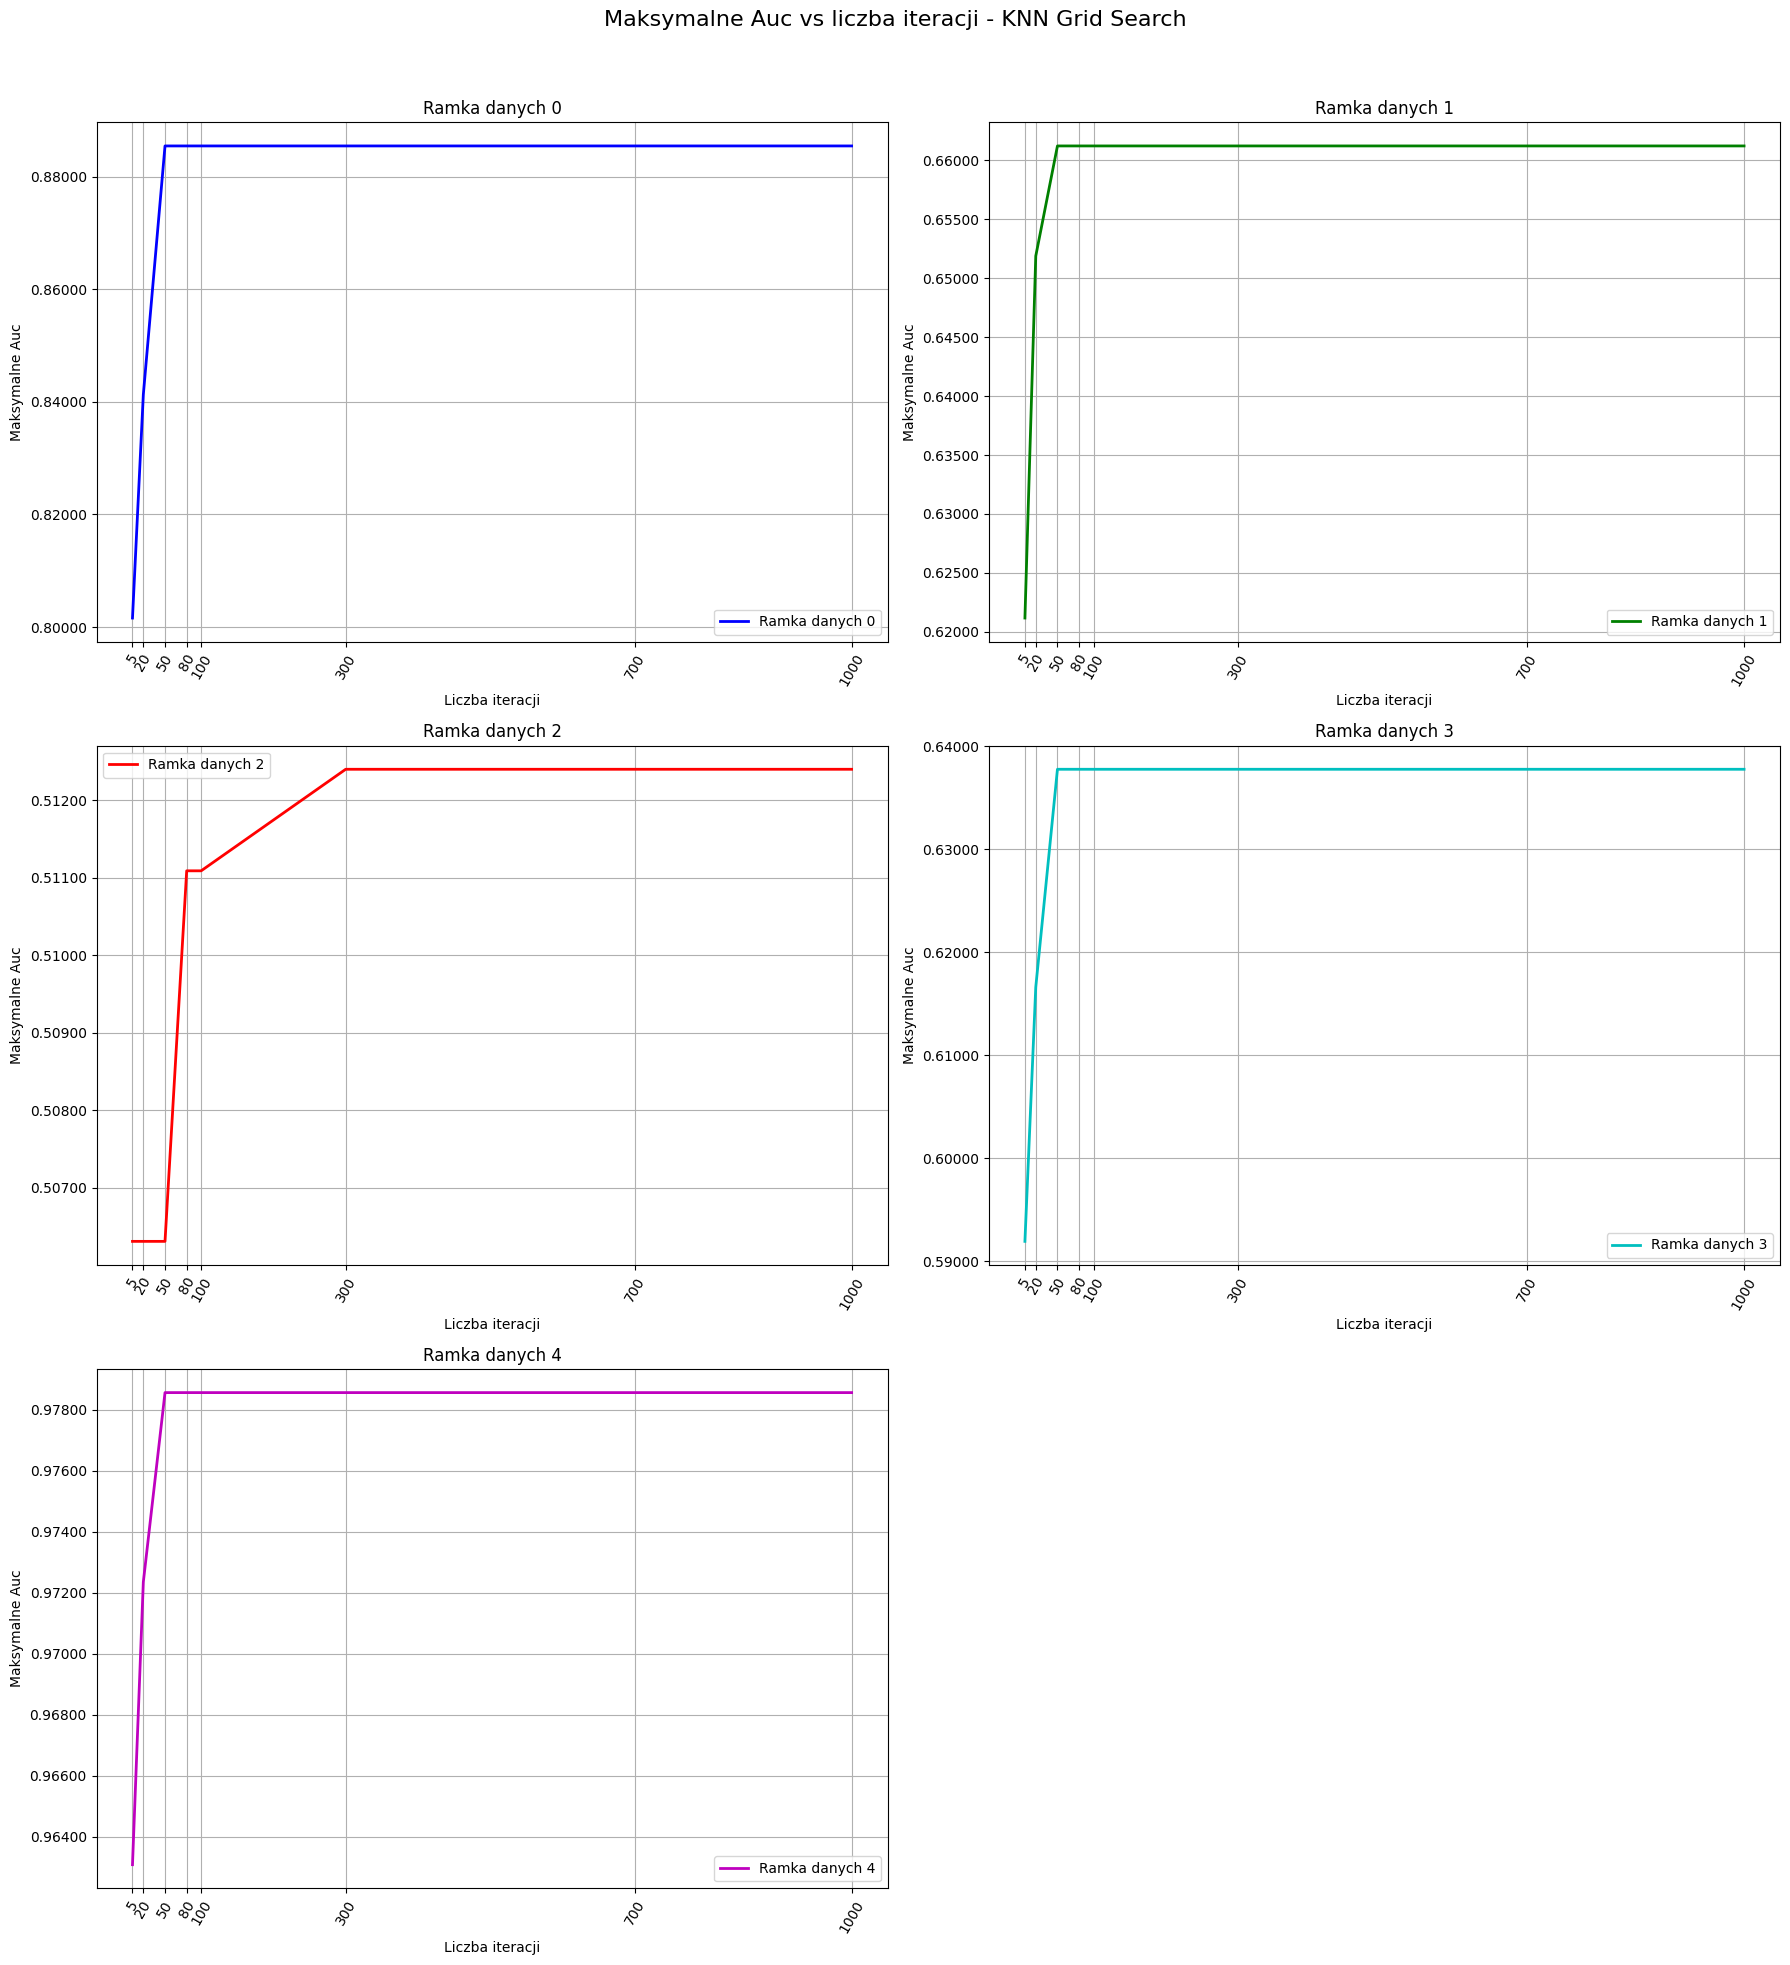

In [177]:
plot_stability(knn_all_params,[5, 20, 50, 80, 100,300,700,1000], 'Maksymalne Auc vs liczba iteracji - KNN Grid Search')

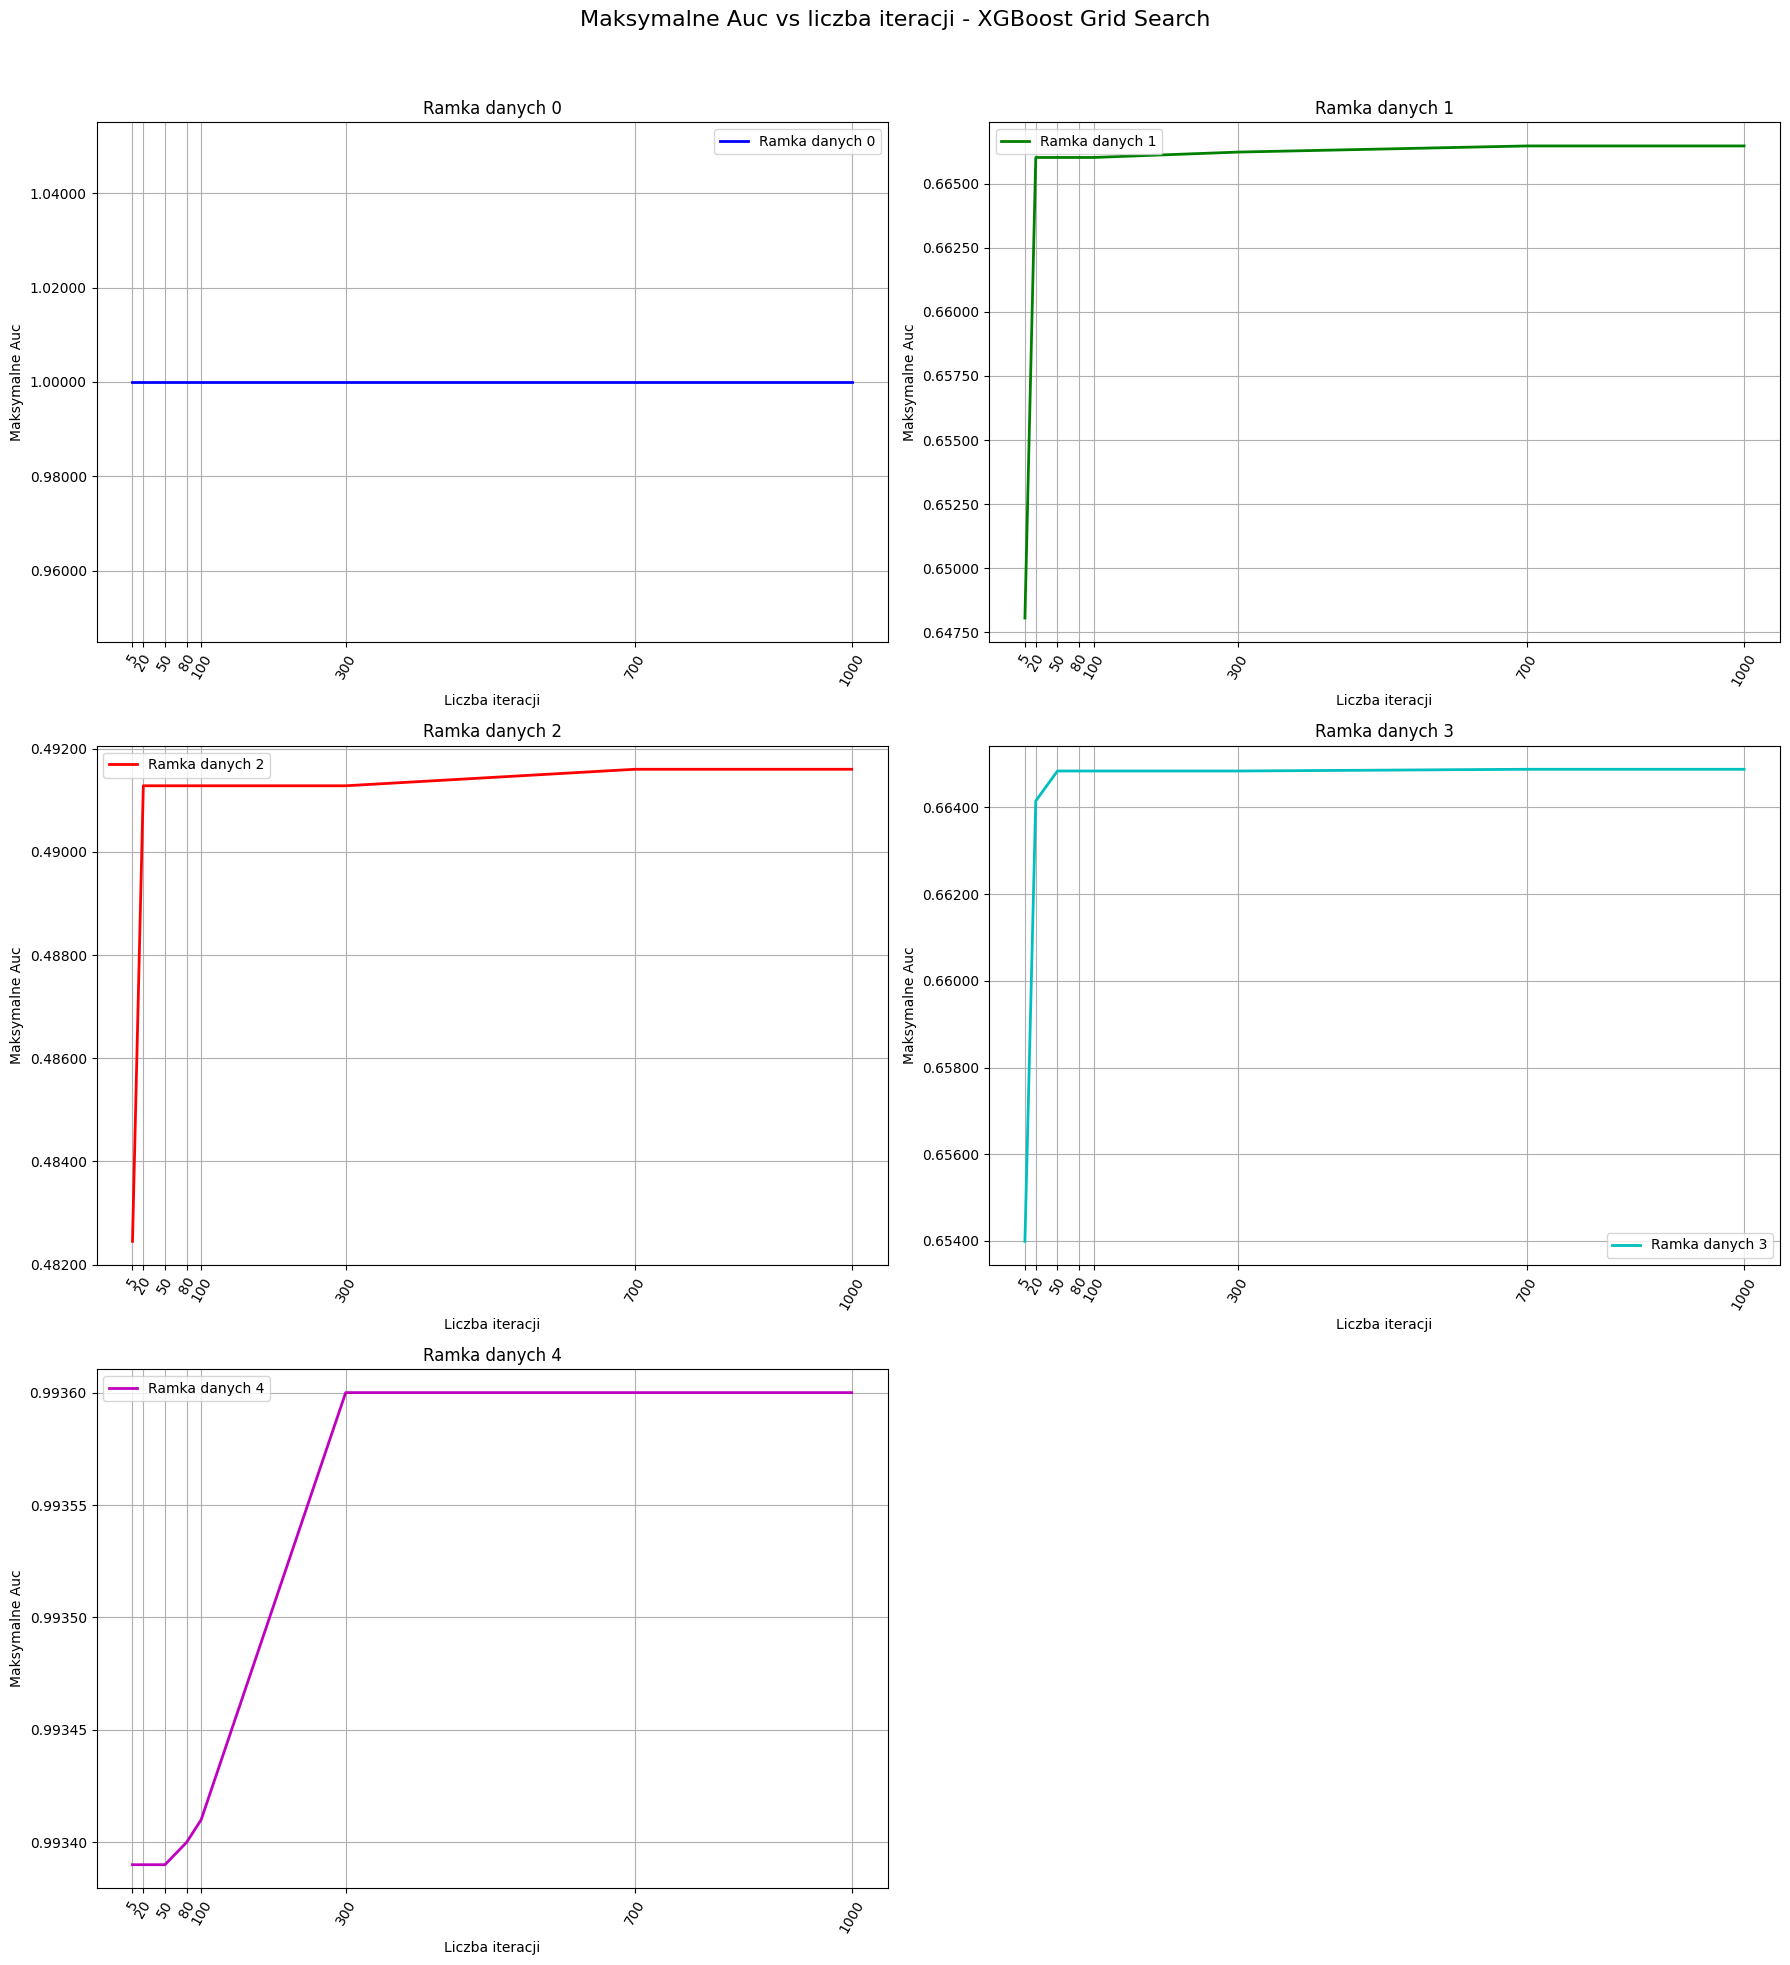

In [179]:
plot_stability(xg_all_params,[5, 20, 50, 80, 100,300,700,1000], 'Maksymalne Auc vs liczba iteracji - XGBoost Grid Search')

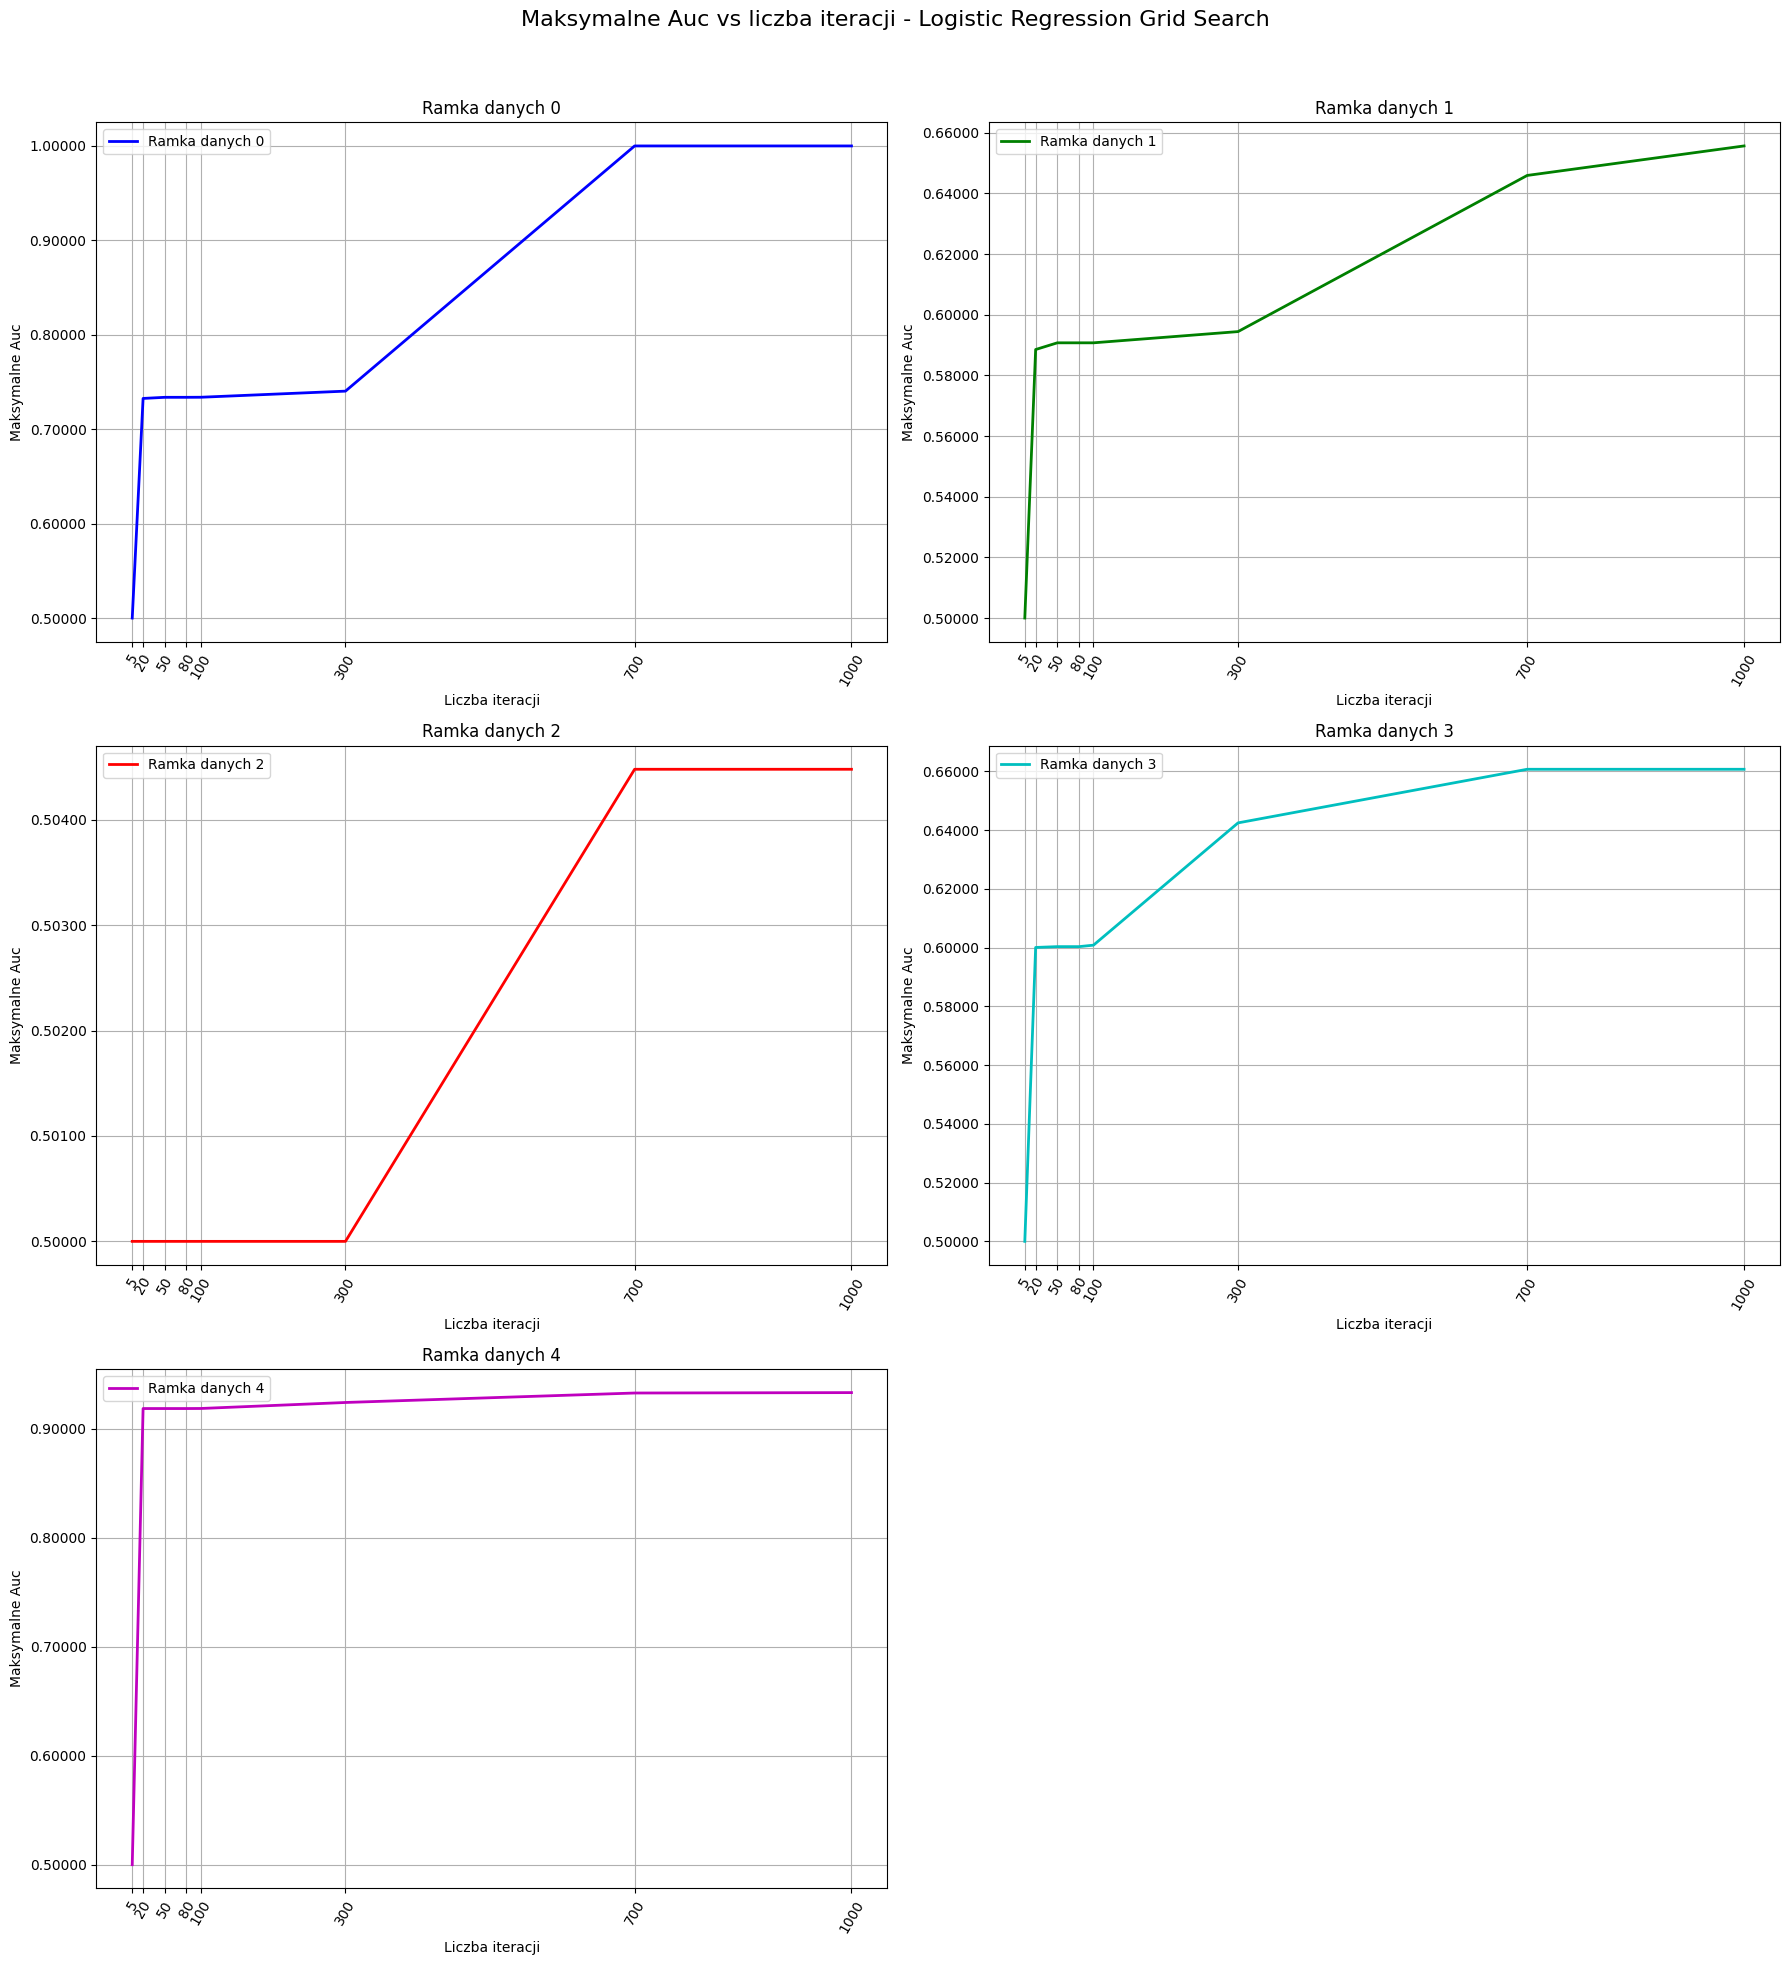

In [181]:
plot_stability(log_all_params,[5, 20, 50, 80, 100,300,700,1000], 'Maksymalne Auc vs liczba iteracji - Logistic Regression Grid Search')

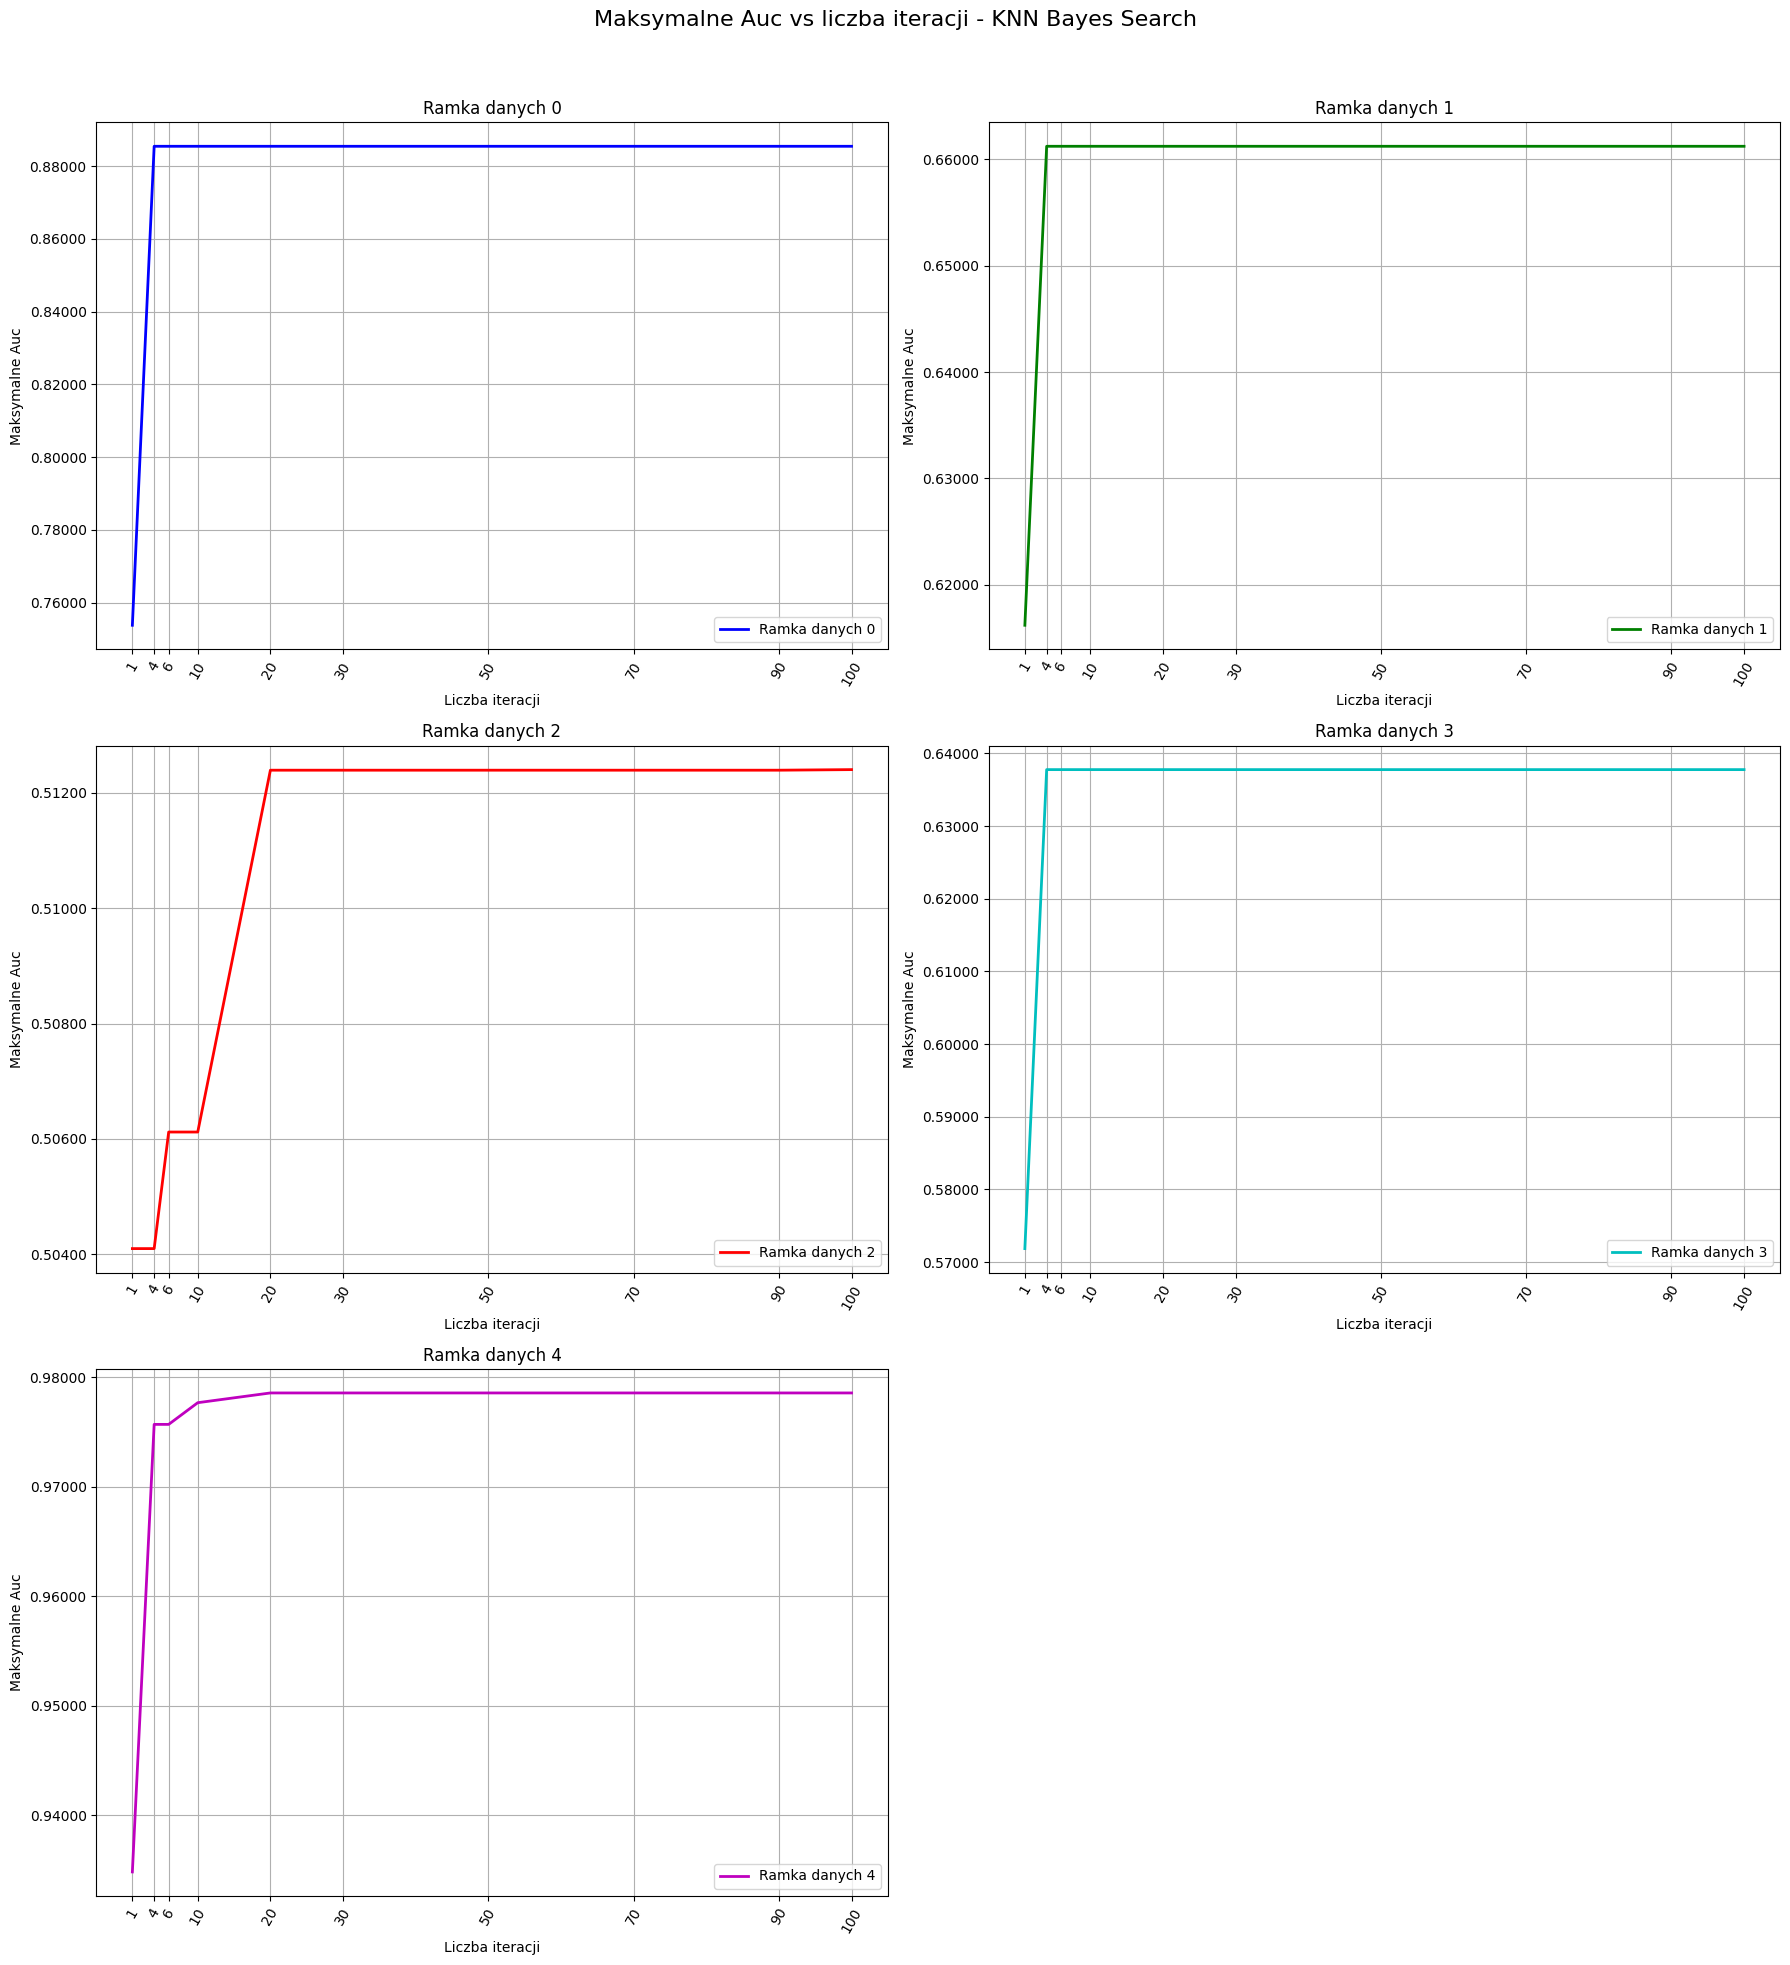

In [184]:
# Bayes search
plot_stability(knn_all_params_bayes,[1,4,6, 10,20,30,50,70,90,100], 'Maksymalne Auc vs liczba iteracji - KNN Bayes Search')

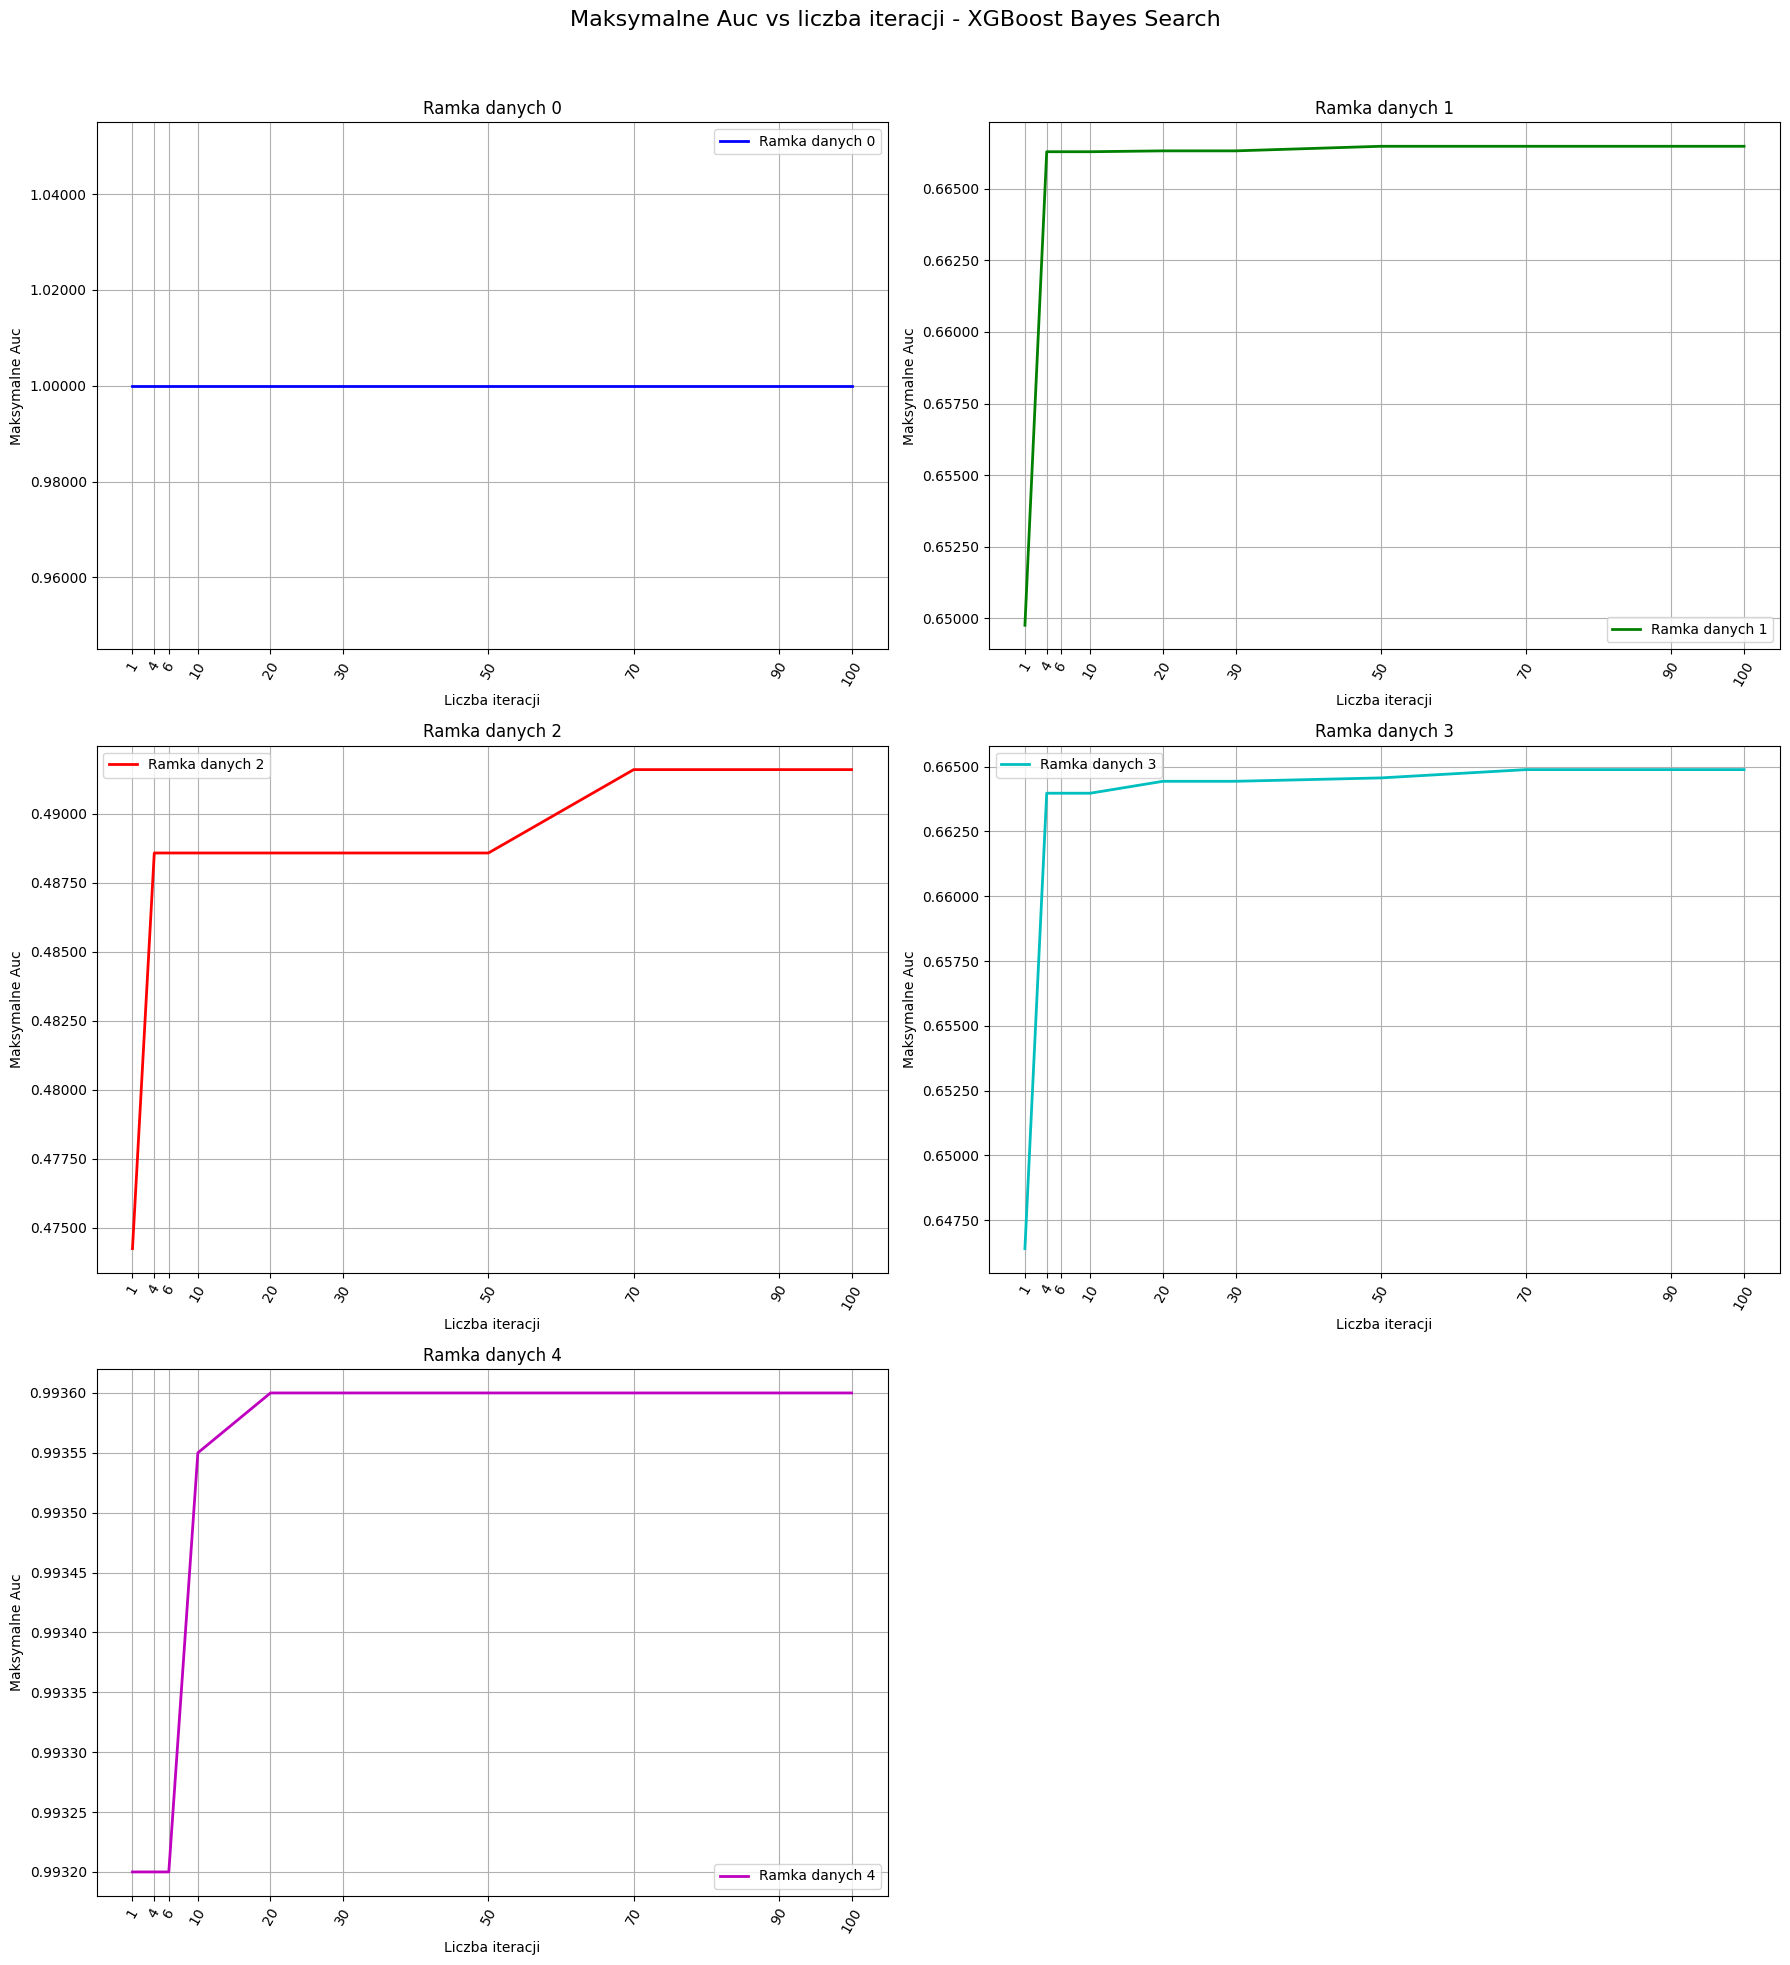

In [185]:
plot_stability(xg_all_params_bayes,[1,4,6, 10,20,30,50,70,90,100], 'Maksymalne Auc vs liczba iteracji - XGBoost Bayes Search')

In [ ]:
# plot_stability(log_all_params_bayes,[1,4,6, 10,20,30,50,70,90,100], 'Maksymalne Auc vs liczba iteracji - KNN Bayes Search') do zrobienia po naprawieniu log

# Tunability

In [194]:
knn_best_params

,df_number,algorithm,leaf_size,metric,n_neighbors,weights,best_score
0,0,auto,20,manhattan,50,distance,0.885430
1,1,auto,20,manhattan,50,distance,0.661218
2,2,auto,40,chebyshev,50,distance,0.512398
3,3,auto,20,manhattan,50,distance,0.637774
4,4,auto,20,manhattan,15,distance,0.978566


In [222]:
model_pairs_gs = [(knn_best_params,return_rows_with_default_params(knn_all_params, knn_default.drop('average_score')).reset_index()),
               (xg_best_params, return_rows_with_default_params(xg_all_params, xg_boost_default.drop('average_score')).reset_index()),
               (log_best_params, return_rows_with_default_params(log_all_params, log_default.drop('average_score')).reset_index())]

all_differences_gs = []
labels = []
modele=['KNN', "XGBoost", "Log Regression"]

for i, (df1, df2) in enumerate(model_pairs_gs):
    differences_gs = df1['best_score'] - df2['mean_test_score']
    all_differences_gs.append(differences_gs)
    labels.append(modele[i])


diff_df_gs = pd.DataFrame(all_differences_gs).T
diff_df_gs

,0,1,2
0,0.000000,0.000000,0.000002
1,0.000011,0.000235,0.001931
2,0.019007,0.015017,0.017248
3,0.000000,0.000317,0.009092
4,0.002869,0.007148,0.000049


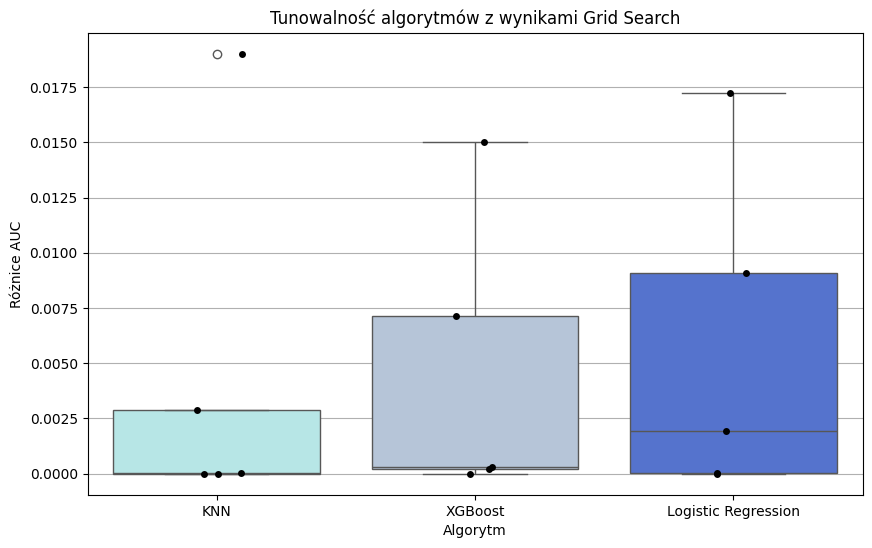

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diff_df_gs, palette=["#AFEEEE", "#B0C4DE", "#4169E1"])

# Dodawanie punktów
sns.stripplot(data=diff_df_gs, color='black', jitter=True)

plt.title('Tunowalność algorytmów z wynikami Grid Search')
plt.xlabel('Algorytm')
plt.ylabel('Różnice AUC')
plt.xticks(ticks=range(len(diff_df_gs.columns)), labels=['KNN', 'XGBoost', 'Logistic Regression'])
plt.grid(axis='y')

plt.show()

Dla bayesa nie mamy gwarancji że przeszliśmy po defaultowych parametrach więc liczymy różnicę między best bayes a defaultowe obliczone z grid search

In [226]:
model_pairs_bs = [(knn_best_params_bayes,return_rows_with_default_params(knn_all_params, knn_default.drop('average_score')).reset_index()),
               (xg_best_params_bayes, return_rows_with_default_params(xg_all_params, xg_boost_default.drop('average_score')).reset_index())]
               #(log_best_params_bayes, return_rows_with_default_params(log_all_params, log_default.drop('average_score')).reset_index())

all_differences_bs = []
labels = []
modele=['KNN', "XGBoost", "Log Regression"]

for i, (df1, df2) in enumerate(model_pairs_bs):
    differences_bs = df1['best_score'] - df2['mean_test_score']
    all_differences_bs.append(differences_bs)
    labels.append(modele[i])


diff_df_bs = pd.DataFrame(all_differences_bs).T
diff_df_bs

,0,1
0,0.000000,0.000000
1,0.000011,0.000235
2,0.019007,0.015017
3,0.000000,0.000317
4,0.002869,0.007148


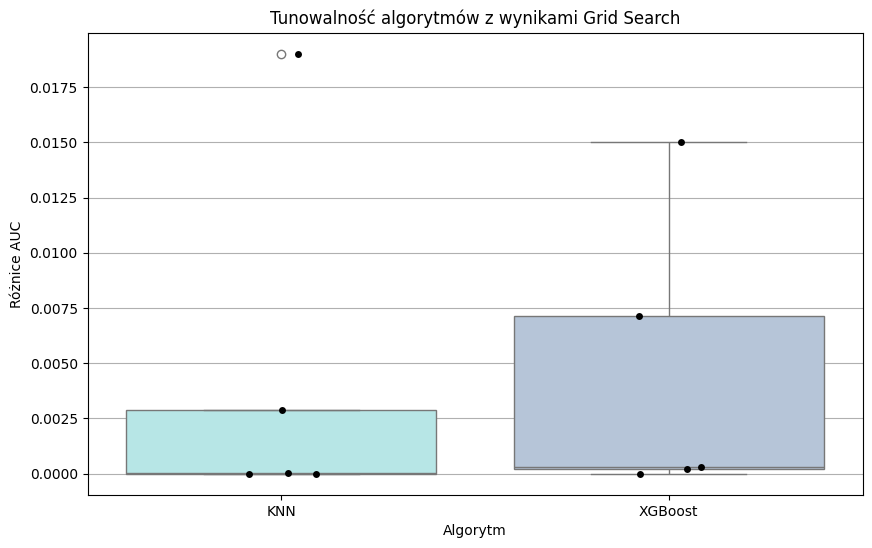

In [227]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=diff_df_bs, palette=["#AFEEEE", "#B0C4DE"])

# Dodawanie punktów
sns.stripplot(data=diff_df_bs, color='black', jitter=True)

plt.title('Tunowalność algorytmów z wynikami Grid Search')
plt.xlabel('Algorytm')
plt.ylabel('Różnice AUC')
plt.xticks(ticks=range(len(diff_df_bs.columns)), labels=['KNN', 'XGBoost'])
plt.grid(axis='y')

plt.show()